# Regression model for determing the housing prices

## importing and splitting data

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [5]:
# import data (only numerical)
# data = pd.read_csv('data/AmesHousingNumData.csv')
# data = pd.read_csv('data/AmesHousingNumData.csv')
data = pd.read_csv('data/AmesHousingCatData.csv')
data = data.drop('Unnamed: 0', axis=1)
data.head()

,MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,...,Kitchen Qual_TA,Garage Finish_None,Garage Finish_RFn,Garage Finish_Unf,Garage Qual_Fa,Garage Qual_Gd,Garage Qual_None,Garage Qual_Po,Garage Qual_TA,SalePrice
0,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,5.332438
1,0,0,0,1,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,5.021189
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,5.235528
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,5.387390
4,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,5.278525


In [6]:
# split data into input and target
target = data['SalePrice']
# final_data = data[['Gr Liv Area', 'Overall Qual']]
final_data = data.drop('SalePrice', axis=1)
final_data.head()

,MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,...,Kitchen Qual_Po,Kitchen Qual_TA,Garage Finish_None,Garage Finish_RFn,Garage Finish_Unf,Garage Qual_Fa,Garage Qual_Gd,Garage Qual_None,Garage Qual_Po,Garage Qual_TA
0,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [7]:
# convert the pandas dataframes to numpy ndarrays
X_np = final_data.to_numpy()
y_np = target.to_numpy()

# split the data into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X_np, y_np, train_size=0.7, random_state=1265599650)


## Building the model

#### Visualizing a single feature 

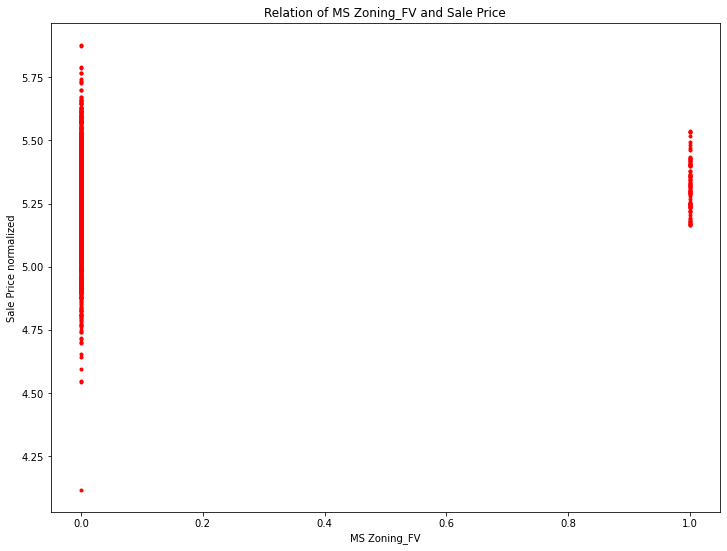

In [8]:
# make column vector out of row vector
y_train = y_train[..., None]

# make column vector for one feature for testing
X_single_feature = X_train[:, 1, None]

# retrieve name of said feature
feature_name = final_data.columns.values[1]

# plot the datapoints
plt.figure(figsize=(12,9))
plt.plot(X_single_feature, y_train, 'r.')
plt.title(f'Relation of {feature_name} and Sale Price')
plt.xlabel(f'{feature_name}')
plt.ylabel('Sale Price normalized')
plt.show()

#### Adding  $x_0$to the data

First an extra feature $x_0$ has to be added to the data. This is to make the computations easier.

In [9]:
def add_x0(x):
    '''
    This function takes a column vector x, adds a column vector of ones in front of it, and returns the 
    combined matrix.
    '''
    # create new feature vector of ones in shape of number of samples * 1 column vector 
    x_zero = np.ones((len(x), 1), dtype = int)

    # combine the new and old feature vectors into matrix
    return np.hstack((x_zero, x))

# create feature with x0
X = add_x0(X_single_feature)


#### Defining the linear model


First, we implement **univariate linear regression** with the feature selected above. The system of linear equations looks like this:

$$x^1_0 \theta_0 + x^1_1 \theta_1 = h_{\theta}(x^1)$$
$$x^2_0 \theta_0 + x^2_1 \theta_1 = h_{\theta}(x^2)$$
$$x^3_0 \theta_0 + x^3_1 \theta_1 = h_{\theta}(x^3)$$ 
$$\dots$$
$$x^m_0 \theta_0 + x^m_1 \theta_1 = h_{\theta}(x^m)$$


x_0 is the column vector of ones that were added in front of the column vector of the selected feature. 

In terms of matrix multiplication:

$$ \left[\begin{array}{cccc}
x^1_0 & x^1_1 \\ 
x^2_0 & x^2_1 \\
x^3_0 & x^3_1 \\ 
\vdots & \vdots \\
x^m_0 & x^m_1 \\ 
\end{array} \right]
\left[\begin{array}{c} \theta_0 \\ \theta_1 \end{array} \right]
= \left[\begin{array}{c} h_{\theta}(x^1) \\ h_{\theta}(x^2) \\
h_{\theta}(x^3) \\ \vdots \\ h_{\theta}(x^m) \end{array} \right]$$


In [10]:
def define_theta(X):
    '''Returns starting vector for theta with amount of features.'''
    return np.ones((X.shape[1], 1))


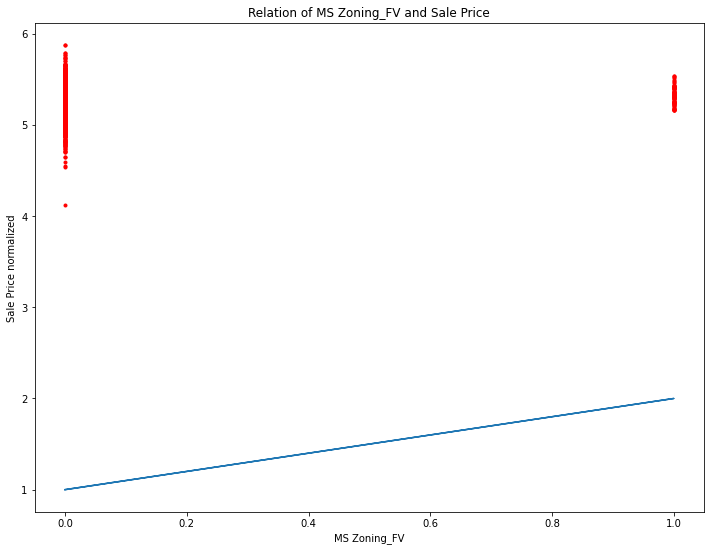

In [11]:
def linear_model(X, theta):
    '''
    This function takes a matrix X and a vector theta and returns the resulting column vector of hypothesis
    values.
    '''
    return np.matmul(X, theta)

theta = define_theta(X)

# compute the linear model
h = linear_model(X, theta)

# plot the model results for just one of the features
plt.figure(figsize=(12,9))
plt.plot(X_single_feature, y_train, 'r.')
plt.plot(X_single_feature, h)
plt.title(f'Relation of {feature_name} and Sale Price')
plt.xlabel(f'{feature_name}')
plt.ylabel('Sale Price normalized')
plt.show()

### Optimizing theta

#### Defining linear cost

In [12]:
def linear_cost(theta, X, y):
    '''
    This function returns the cost using matrix multiplication. 
    '''
    # m is identical to the number of rows in X
    m = X.shape[0]


    # compute error vector 
    residual = linear_model(X, theta) - y
    
    # compute cost vector  
    cost = np.matmul(residual.T, residual) / (2 * m)
    
    # convert the resulting 1 x 1 numpy matrix to an actual scalar 
    return np.squeeze(cost)

#### Defining gradient vector

In [13]:
def gradient_vector(theta, X, y):
    '''
    This functions returns a (n + 1) * 1 column vector of partial derivatives. 
    '''
    # m is identical to the number of rows in X
    m = X.shape[0]
    
    # compute error vector
    error = linear_model(X, theta) - y 
    
    # compute matrix product of the error and X
    gradient_vector = np.matmul(X.T, error) / m
  
    return gradient_vector


Found the following values for theta:
[[5.21332204]
 [0.13231017]]

The cost is 0.015273089945150963.

Resulting in the following model:


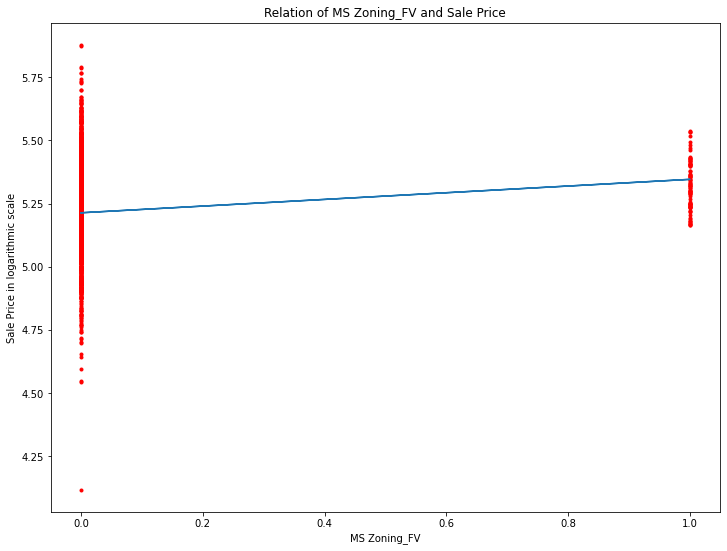

In [14]:
def gradient_descent(X, y, theta, alpha, thres=10**-6):
    '''
    This function returns a vector for theta for which the cost is the minimum. 
    '''
    # calculate cost with current theta
    previous_cost = linear_cost(theta, X, y)
    
    # set cost difference to amount bigger than the threshold and bigger than 0
    cost_difference = thres + 1
    
    # loop indefinitely until algorithm converges
    while cost_difference > thres: 
        
        # compute and update theta parameters in a single operation
        theta = theta - alpha * gradient_vector(theta, X, y)

        # calculate cost vector with new theta
        current_cost = linear_cost(theta, X, y)

        cost_difference = abs(current_cost - previous_cost)
        
        #print(cost_difference)

        if current_cost > previous_cost:
            print('The algorithm is diverging.')
            return theta, previous_cost

        previous_cost = current_cost
    
    return theta, previous_cost

# find the theta vector that minimizes the cost function
theta_hat, cost = gradient_descent(X, y_train, theta, 0.9)
print("\nFound the following values for theta:")
print(theta_hat)
print(f'\nThe cost is {cost}.')

# plot the model results
print("\nResulting in the following model:")
h = linear_model(X, theta_hat)
plt.figure(figsize=(12,9))
plt.plot(X_single_feature, y_train, 'r.')
plt.plot(X_single_feature, h)
plt.title(f'Relation of {feature_name} and Sale Price')
plt.xlabel(f'{feature_name}')
plt.ylabel('Sale Price in logarithmic scale')
plt.show()

#### Visualizing multiple features

C:\Users\Gebruiker\anaconda3\envs\progLab\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  # Remove the CWD from sys.path while we load stuff.


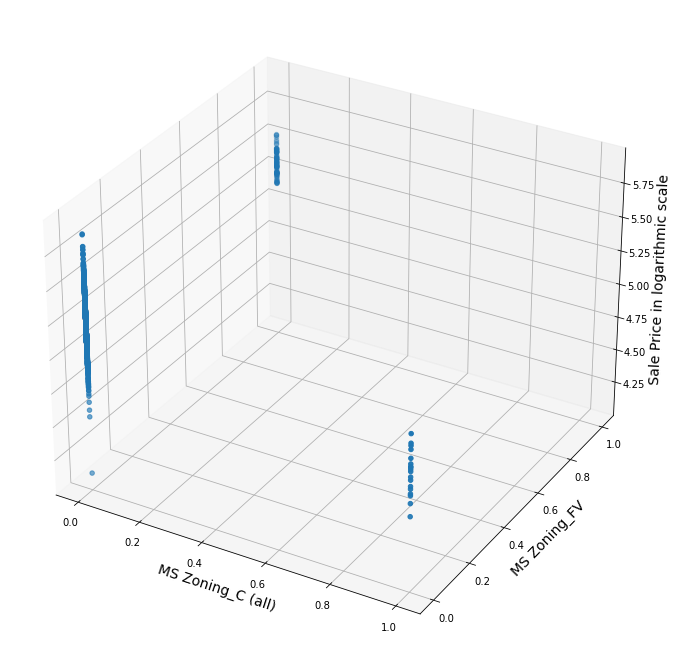

In [15]:
from mpl_toolkits.mplot3d import Axes3D

# make matrix for all features (two for now)
X_all_train = X_train[:, 0:]

#retrieve name of second feature
second_feature_name = final_data.columns.values[0]

#create 3d plot
ax = Axes3D(plt.figure(figsize=(12,9)))

# retrieve datapoints and plot
xs = X_all_train[:, 0]
ys = X_all_train[:, 1]
zs = y_train
ax.scatter(xs, ys, zs)

# set layout
ax.set_xlabel(f'{second_feature_name}', fontsize=14)
ax.set_ylabel(f'{feature_name}', fontsize=14)
ax.set_zlabel('Sale Price in logarithmic scale', fontsize=14)

plt.show()

#### Defining multivariate linear regression

Our model is a **multivariate linear** regression model which will look like the following:

$$x^1_0 \theta_0 + x^1_1 \theta_1 + \dots + x^1_n \theta_n = h_{\theta}(x^1)$$
$$x^2_0 \theta_0 + x^2_1 \theta_1 + \dots + x^2_n \theta_n = h_{\theta}(x^2)$$
$$x^2_0 \theta_0 + x^2_1 \theta_1 + \dots + x^2_n \theta_n = h_{\theta}(x^2)$$
$$\dots$$
$$x^m_0 \theta_0 + x^m_1 \theta_1 + \dots + x^m_n \theta_n = h_{\theta}(x^m)$$


In terms of matrix multiplication:

$$ \left[\begin{array}{cccc}
x_0^1 & x_1^1 & x_2^1 & \cdots & x_n^1 \\ 
x_0^2 & x_1^2 & x_2^2 & \cdots & x_n^2 \\ 
x_0^3 & x_1^3 & x_2^3 & \cdots & x_n^3 \\ 
\vdots & \vdots & \vdots & \ddots & \vdots \\
x_0^m & x_1^m & x_2^m & \cdots & x_n^m \\ 
\end{array} \right]
\left[\begin{array}{c} \theta_0 \\ \theta_1 \\
\theta_2 \\ \vdots \\ \theta_n \end{array} \right]
= \left[\begin{array}{c} h_{\theta}(x^1) \\ h_{\theta}(x^2) \\
h_{\theta}(x^3) \\ \vdots \\ h_{\theta}(x^m) \end{array} \right]$$

With *n* being the number of features and *m* the number of samples.

In [16]:
# add x zero
X_train_x0 = add_x0(X_all_train)

theta = define_theta(X_train_x0)

# compute the linear model
h = linear_model(X_train_x0, theta)

theta_hat, cost = gradient_descent(X_train_x0, y_train, theta, 0.05)
print("\nFound the following values for theta:")
print(theta_hat)
print(f'\nThe cost is {cost}.')


Found the following values for theta:
[[ 0.37352818]
 [ 0.76160814]
 [ 0.91636079]
 [ 0.93954725]
 [ 0.89505704]
 [ 0.96408719]
 [ 0.93175831]
 [ 0.95730441]
 [ 0.77245064]
 [ 0.86678716]
 [ 0.98289148]
 [ 0.90555352]
 [ 1.00912988]
 [ 0.84356303]
 [ 0.88281146]
 [ 0.95833825]
 [ 0.98621922]
 [ 0.82253626]
 [ 0.99329968]
 [ 0.78242946]
 [ 0.91262001]
 [ 0.86524156]
 [ 0.93411425]
 [ 0.91277805]
 [ 1.06655693]
 [ 1.04750828]
 [ 0.87374466]
 [ 0.90981653]
 [ 0.87096913]
 [ 0.89122335]
 [ 0.97305431]
 [ 1.10203504]
 [ 0.9841961 ]
 [ 0.99741318]
 [ 0.69921387]
 [ 0.69762157]
 [ 0.99535005]
 [ 0.97893936]
 [ 0.97308296]
 [ 0.94960899]
 [ 0.94972295]
 [ 0.76694397]
 [ 0.98282269]
 [ 0.96829668]
 [ 1.        ]
 [ 0.76946107]
 [ 0.85544945]
 [ 0.95946342]
 [ 0.54104124]
 [ 0.95586165]
 [ 0.48776945]
 [ 0.549572  ]
 [ 0.11767854]
 [ 0.07484896]
 [ 0.02852828]
 [ 0.0574049 ]
 [ 0.04728098]
 [ 0.07100244]
 [ 0.94738682]
 [ 0.05073517]
 [ 0.1206143 ]
 [-0.10744054]
 [-0.07741335]
 [ 1.        ]
 

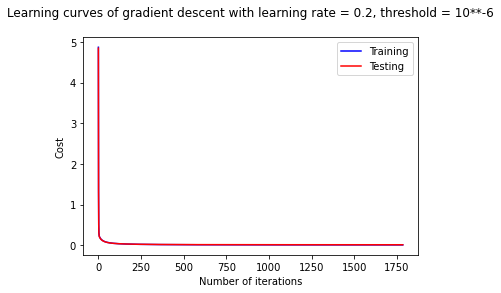


The training cost is 0.008068041687270693. The testing cost is 0.01201474486576692.


In [17]:
def gradient_descent_learning_curves(X_train, y_train, X_test, y_test, theta, alpha, thres):
    '''
    Implements gradient descent, stores training and testing cost at every step, and plots learning curves.
    '''
    # initialize number of iterations
    iteration = 0
    iterations = []
    
    # create lists for training and testing cost to keep track at each step
    current_costs_train = []
    current_costs_test = []

    # compute training cost with start theta
    previous_cost = linear_cost(theta, X_train, y_train)

    cost_diff = thres + 1

    while cost_diff > thres:

        iteration += 1
        iterations.append(iteration)

        theta = theta - alpha * gradient_vector(theta, X_train, y_train)

        current_cost_train = linear_cost(theta, X_train, y_train)
        current_costs_train.append(current_cost_train)
        
        current_cost_test = linear_cost(theta, X_test, y_test)
        current_costs_test.append(current_cost_test)

        cost_diff = previous_cost - current_cost_train

        if cost_diff < 0:
            print('The algorithm is diverging.')

        previous_cost = current_cost_train
        
    #print(current_costs_train)
    # plot learning curves
    plt.plot(iterations, current_costs_train, 'b-', label='Training')
    plt.plot(iterations, current_costs_test, 'r-', label='Testing')    
    plt.xlabel('Number of iterations')
    plt.ylabel('Cost')
    plt.legend()
    plt.show()
    
    return theta, current_cost_train, current_cost_test

# make matrix for all features 
X_all_test = X_test[:, 0:]

# add x zero
X_test_x0 = add_x0(X_all_test)

# make column vector out of row vector
y_test = y_test[..., None]

# Initialize theta to a zero vector of the correct shape
theta = define_theta(X_train_x0)

#Find the theta vector that minimizes the cost function
# plt.title('Learning curves of gradient descent with learning rate = 10**-4, threshold = 10**-6')
# theta_hat, cost_train, cost_test = gradient_descent_learning_curves(X_train_x0, y_train, X_test_x0, y_test, theta, 10**-4, 10**-6)
# print(f'\nThe cost is {cost_train}. The testing cost is {cost_test}.')
# plt.title('Learning curves of gradient descent with learning rate = 10**-3, threshold = 10**-4')
# theta_hat, cost_train, cost_test = gradient_descent_learning_curves(X_train_x0, y_train, X_test_x0, y_test, theta, 10**-3, 10**-4)
# print(f'\nThe cost is {cost_train}. The testing cost is {cost_test}.')
plt.title('Learning curves of gradient descent with learning rate = 0.2, threshold = 10**-6\n')
theta_hat, cost_train, cost_test = gradient_descent_learning_curves(X_train_x0, y_train, X_test_x0, y_test, theta, 0.2, 10**-6)
print(f'\nThe training cost is {cost_train}. The testing cost is {cost_test}.')




#### Conclusion

*We tested three different values for the learning rate and the convergence threshold of gradient descent. We first used learning rate 10-4 and threshold 10**-6. Since this is a rather small value for the learning rate, it takes more than 20000 steps until the algorithm converges. This makes the algorithm rather slow. We then tested two slightly larger values for both, namely learning rate 10-3, threshold 10-4. Since the learning rate is bigger, the algorithm needs less steps, namely around 1200 to converge. Since the threshold is larger, the algorithm converges at a higher cost. Therefore, we made the learning rate even higher, but changed the threshold back to the one I used before. The cost is lower than either cost before, and the algorithm needs less steps to converge. The final model is therefore the best one so far.*

#### Prediction accuracy

Taken from https://www.kaggle.com/kamalp0/ames-housing-regression-model

In [18]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
predictions = linear_model(X_test_x0, theta_hat)

# calculate average error
MSE = mean_squared_error(y_test, predictions)

# calculate standard deviation
RMSE = np.sqrt(MSE)

# calculate average price
avg_price = np.mean(target)

off_by = (RMSE)/ avg_price* 100

print(f'The theta values for our linear model are:\n{theta_hat}')
print(f'The test voor MSE for our linear model was {MSE}')
print(f'The test RMSE for our linear model {RMSE}')
print(f'The percentage our model was off compared to the real house price was:{off_by}')



The theta values for our linear model are:
[[ 0.51983549]
 [ 0.78483272]
 [ 0.93420957]
 [ 0.92083684]
 [ 0.93343926]
 [ 1.0044159 ]
 [ 0.96344074]
 [ 0.90620754]
 [ 0.74456821]
 [ 0.87006904]
 [ 0.96940261]
 [ 0.85192773]
 [ 0.97416919]
 [ 0.81934294]
 [ 0.84162054]
 [ 0.90928387]
 [ 0.98890774]
 [ 0.8451563 ]
 [ 0.98854209]
 [ 0.72566337]
 [ 0.87940095]
 [ 0.84574837]
 [ 0.87540008]
 [ 0.88572898]
 [ 1.00212383]
 [ 0.93676902]
 [ 0.86075804]
 [ 0.8946391 ]
 [ 0.84693556]
 [ 0.85070771]
 [ 0.93199843]
 [ 0.98454202]
 [ 0.91655229]
 [ 0.95206728]
 [ 0.72086864]
 [ 0.75597466]
 [ 0.98431573]
 [ 0.93173673]
 [ 0.96301796]
 [ 0.92604177]
 [ 0.92443137]
 [ 0.83703465]
 [ 0.97921377]
 [ 0.95666217]
 [ 1.        ]
 [ 0.82934203]
 [ 0.83607828]
 [ 0.95591876]
 [ 0.39496077]
 [ 0.89875592]
 [ 0.3461519 ]
 [ 0.38629862]
 [-0.04729381]
 [ 0.0193778 ]
 [-0.03345562]
 [-0.06036967]
 [-0.01047881]
 [-0.06705179]
 [ 0.88883344]
 [-0.0383461 ]
 [ 0.09134041]
 [-0.16540548]
 [-0.08948247]
 [ 1.       

In [19]:

from sklearn.linear_model import LinearRegression

linear_model2 = LinearRegression()

linear_model2.fit(X_train, y_train)

predict = linear_model2.predict(X_test)

linear_test_mae = mean_absolute_error(y_test, predict)
linear_test_rmse = np.sqrt(mean_squared_error(y_test, predict))

print(f'The test MAE for our linear model {linear_test_mae}')
print(f'The test RMSE for our linear model {linear_test_rmse}')

print(f'The theta values for the sklearn linear model are:\n{linear_model2.intercept_} and {linear_model2.coef_}')

The test MAE for our linear model 0.06589249506749624
The test RMSE for our linear model 0.09439593925447883
The theta values for the sklearn linear model are:
[4.45831647] and [[ 5.56997745e-01  6.40597653e-01  5.91097760e-01  6.48949297e-01
   6.93096780e-01  6.58444367e-01 -2.77466217e-02 -9.14392906e-02
  -2.34606108e-03  1.03947295e-01  2.96972209e-02  1.31132828e-01
  -3.16577553e-02  2.73643674e-02  2.33465360e-02  2.49749163e-01
  -2.44690010e-02  3.20877873e-02 -1.34524625e-01  3.95675395e-02
   4.40821103e-03 -1.46898485e-02  6.30277791e-02  1.87026705e-01
   8.51595723e-02  8.00833565e-03  3.11414026e-02 -5.86872747e-03
   2.84011937e-02  9.70299567e-02  1.22633283e-01  8.20772291e-02
   1.08764182e-01  1.17111129e-02 -2.54699677e-03  1.34663000e-01
  -4.67423322e-02  1.02805760e-01 -6.86657994e-02 -1.23383347e-01
   2.65203517e-01  3.95393094e-01  2.99274842e-01  9.57567359e-16
   3.31283470e-01  2.98002226e-01  3.87618425e-01  1.21870564e-02
  -2.14365586e-01 -1.00693924e-